This is the conintuation of a notebook to summarize the assembletics results when mapping haplotigs on primary contigs.
The haplotigs were specifically mapped to the respective primary contig:
The scripts do to this are in /home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/Assembletics
Pst_104E_v12_ncumer_assembleticsmapping.sh 
and 
Pst_104E_v12_assemblytics.sh

###### Assembltic was run with the following parameters###

* anchor of 8000 based on the TE size
* windows either being 10kp or 50kp



In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from itertools import product
import colormap as cmaps

In [3]:
def return_contig_id(x):
    import re
    pattern = re.compile('_(pcontig_[0-9]*)')
    return pattern.search(x).groups()[0]

In [4]:
#define the input folder
ASSEMBLETIC_FODLER = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/Assembletics'
FIGURE_PATH = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/figures'

In [5]:
os.chdir(ASSEMBLETIC_FODLER)

In [6]:
#get the folders and the pcontigs fasta files
_8kbp_folders = [x for x in os.listdir(ASSEMBLETIC_FODLER) if x.endswith('_8kbp')]
pcontig_fa = [x for x in os.listdir(ASSEMBLETIC_FODLER) if x.endswith('.fa') and '_pcontig' in x and 'h_ctgs' not in x]

In [7]:
len(_8kbp_folders) - len(pcontig_fa) #makes sense as this is the number of pwoh contigs plus whole assembly 

-57

In [8]:
#make dataframe for 10kb windows
_8kbp_folders.sort()
Assemblytics_summary_df_list_10kb = []
#Assemblytics_summary_df_list_50kb = []
variation_types = ['Insertion', 'Deletion', 'Tandem_expansion', 'Tandem_contraction', 'Repeat_expansion', 'Repeat_contraction']
for folder in _8kbp_folders:
    #get the summary file
    summary_file_10kb = [x for x in os.listdir(os.path.abspath(folder)) \
                    if x.endswith('10kp.Assemblytics_structural_variants.summary.csv')][0]
    #summary_file_50kb = [x for x in os.listdir(os.path.abspath(folder)) \
              #      if x.endswith('_50kp.Assemblytics_structural_variants.summary.csv')][0]
    file_name_10kb = ''
    file_name_10kb = os.path.join(ASSEMBLETIC_FODLER, folder, summary_file_10kb)
    #file_name_50kb = ''
    #file_name_50kb = os.path.join(base_folder, folder, summary_file_50kb)
    #now convert summary file to a df usable file
    with open(file_name_10kb) as s_handle:
        out_handle = open(file_name_10kb.replace('.csv', '.df'), 'w')
        variation_type = ''
        for line in s_handle:
            if line.strip() == '':
                continue
            if 'Total' in line:
                continue
            line = line.strip('\n')
            if line in variation_types:
                variation_type = line
                next
            else:
                line = variation_type + ','+line
                print(line, file=out_handle)
        out_handle.close()  
    #now read in the dataframe and reformat the indexes so it is useful later on
    #Multiindex column contig_id, numbers; Multiindex rows Type and size range
    contig = ''
    contig = return_contig_id(folder)
    #print('Reading in %s' % (contig))
    var_df = ''
    var_df = pd.read_csv(file_name_10kb.replace('.csv', '.df'), header=None, names=['Type', 'Size range', 'Count', 'Total bp'])
    if len(var_df) == 0: #some contigs might not have any variations called.
        continue
    index = pd.MultiIndex.from_tuples(list(zip(var_df['Type'],var_df['Size range'])), names=['Type', 'Size range'])
    var_df = var_df.set_index(index)
    var_df = var_df.iloc[:,2:] #subset the two remaining useful columns
    old_columns = list(var_df.columns)
    col_index = pd.MultiIndex.from_tuples(list(zip([contig, contig], old_columns)),names = ['contig_id','numbers'])
    var_df.columns = col_index
    Assemblytics_summary_df_list_10kb.append(var_df)
Assemblytics_summary_df_10kb = pd.concat(Assemblytics_summary_df_list_10kb, axis=1)

In [9]:
#make dataframe for 50kb windows
_8kbp_folders.sort()
Assemblytics_summary_df_list_50kb = []
variation_types = ['Insertion', 'Deletion', 'Tandem_expansion', 'Tandem_contraction', 'Repeat_expansion', 'Repeat_contraction']
for folder in _8kbp_folders:
    #get the summary file
    
    summary_file_50kb = [os.path.join(os.path.abspath(folder), x) for x in os.listdir(os.path.abspath(folder)) \
              if x.endswith('_50kp.Assemblytics_structural_variants.summary.csv')][0]
    file_name_50kb = ''
    file_name_50kb = os.path.join(ASSEMBLETIC_FODLER, folder, summary_file_50kb)
    #now convert summary file to a df usable file
    with open(summary_file_50kb) as s_handle:
        out_handle = open(file_name_50kb.replace('.csv', '.df'), 'w')
        variation_type = ''
        for line in s_handle:
            if line.strip() == '':
                continue
            if 'Total' in line:
                continue
            line = line.strip('\n')
            if line in variation_types:
                variation_type = line
                next
            else:
                line = variation_type + ','+line
                print(line, file=out_handle)
        out_handle.close()  
    #now read in the dataframe and reformat the indexes so it is useful later on
    #Multiindex column contig_id, numbers; Multiindex rows Type and size range
    contig = ''
    contig = return_contig_id(folder)
    #print('Reading in %s' % (contig))
    var_df = ''
    var_df = pd.read_csv(file_name_50kb.replace('.csv', '.df'), header=None, names=['Type', 'Size range', 'Count', 'Total bp'])
    if len(var_df) == 0: #some contigs might not have any variations called.
        continue
    index = pd.MultiIndex.from_tuples(list(zip(var_df['Type'],var_df['Size range'])), names=['Type', 'Size range'])
    var_df = var_df.set_index(index)
    var_df = var_df.iloc[:,2:] #subset the two remaining useful columns
    old_columns = list(var_df.columns)
    col_index = pd.MultiIndex.from_tuples(list(zip([contig, contig], old_columns)),names = ['contig_id','numbers'])
    var_df.columns = col_index
    Assemblytics_summary_df_list_50kb.append(var_df)
Assemblytics_summary_df_50kb = pd.concat(Assemblytics_summary_df_list_50kb, axis=1)

In [10]:
#save out the summary dataframes
Assemblytics_summary_df_50kb.to_csv(os.path.join(ASSEMBLETIC_FODLER, 'Assemblytics_summary_df_50kb.df'))
Assemblytics_summary_df_10kb.to_csv(os.path.join(ASSEMBLETIC_FODLER, 'Assemblytics_summary_df_10kb.df'))

In [11]:
Assemblytics_summary_df_10kb.unstack()

contig_id          pcontig_000                                           \
numbers                  Count                                 Total bp   
Size range             1-10 bp 10-50 bp 50-500 bp 500-10000 bp  1-10 bp   
Type                                                                      
Deletion                  2096      111         7            8     3928   
Insertion                 1745       96         9           17     3696   
Repeat_contraction           0        4        10           18        0   
Repeat_expansion             1        2         8           12        8   
Tandem_contraction           0        0         0            5        0   
Tandem_expansion             0        0         5            4        0   

contig_id                                          pcontig_001           \
numbers                                                  Count            
Size range         10-50 bp 50-500 bp 500-10000 bp     1-10 bp 10-50 bp   
Type                                                                      
Deletion               1893      1648        13689        1826       81   
Insertion              1664      1592        53726        1563       69   
Repeat_contraction       88      2222        49264           0        2   
Repeat_expansion         89      1329        57083           0        2   
Tandem_contraction        0         0        25135           0        0   
Tandem_expansion          0      1393        22469           0        0   

contig_id              ...      pcontig_189              pcontig_225           \
numbers                ...         Total bp                    Count            
Size range             ...        50-500 bp 500-10000 bp     1-10 bp 10-50 bp   
Type                   ...                                                      
Deletion               ...                0            0          45        1   
Insertion              ...                0            0          31        1   
Repeat_contraction     ...                0            0           0        0   
Repeat_expansion       ...                0            0           0        0   
Tandem_contraction     ...                0            0           0        0   
Tandem_expansion       ...                0            0           0        0   

contig_id                                                              \
numbers                                   Total bp                      
Size range         50-500 bp 500-10000 bp  1-10 bp 10-50 bp 50-500 bp   
Type                                                                    
Deletion                   0            0       50       12         0   
Insertion                  0            0       54       10         0   
Repeat_contraction         0            0        0        0         0   
Repeat_expansion           0            0        0        0         0   
Tandem_contraction         0            0        0        0         0   
Tandem_expansion           0            0        0        0         0   

contig_id                        
numbers                          
Size range         500-10000 bp  
Type                             
Deletion                      0  
Insertion                     0  
Repeat_contraction            0  
Repeat_expansion              0  
Tandem_contraction            0  
Tandem_expansion              0  

[6 rows x 776 columns]

In [12]:
Assemblytics_summary_df_10kb.sum(level='numbers', axis=1)['Total bp']/1000

Type                Size range  
Insertion           1-10 bp           70.727
                    10-50 bp          35.834
                    50-500 bp         47.360
                    500-10000 bp     881.457
Deletion            1-10 bp           72.261
                    10-50 bp          36.161
                    50-500 bp         42.844
                    500-10000 bp     595.253
Tandem_expansion    1-10 bp            0.000
                    10-50 bp           0.086
                    50-500 bp         10.608
                    500-10000 bp     394.706
Tandem_contraction  1-10 bp            0.000
                    10-50 bp           0.070
                    50-500 bp          6.014
                    500-10000 bp     176.600
Repeat_expansion    1-10 bp            0.092
                    10-50 bp           1.287
                    50-500 bp         32.946
                    500-10000 bp    1095.843
Repeat_contraction  1-10 bp            0.094
                    10

In [13]:
#here get the summary of all Types of variations by size intervals given by Assembletics
Size_summary_10kb = Assemblytics_summary_df_10kb.sum(level='numbers', axis=1)['Total bp']/1000
index_a = [x.replace(' bp', '') for x in Size_summary_10kb["Insertion"].index]
var_types = Size_summary_10kb.index.levels[0]



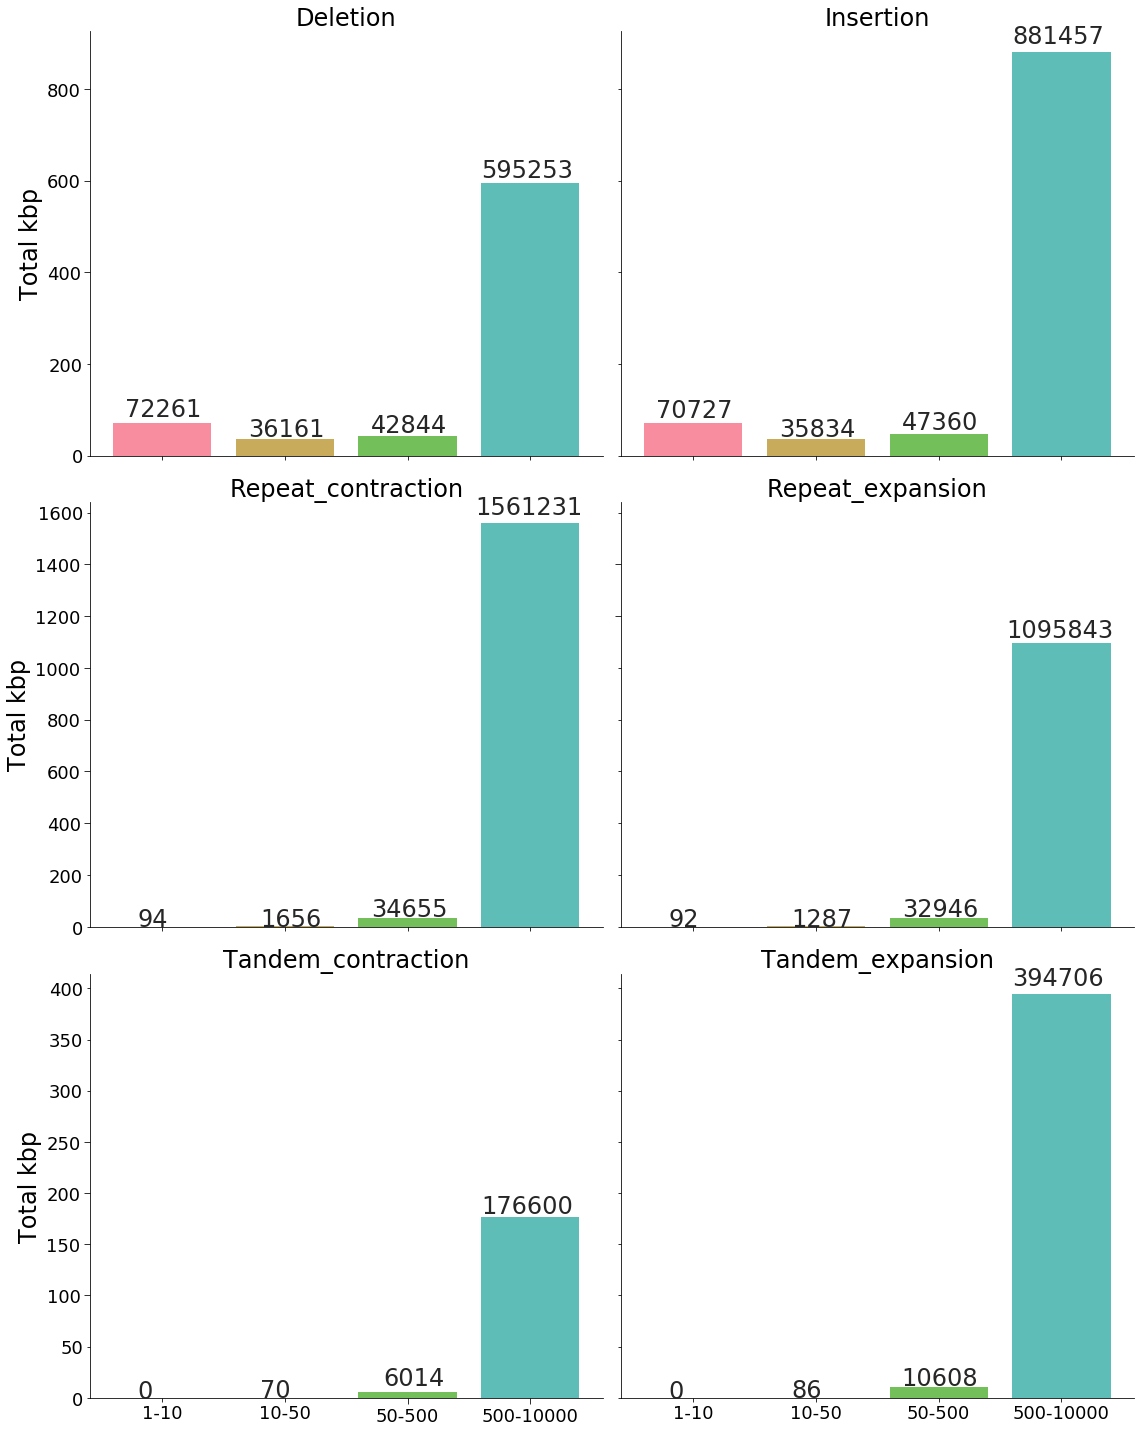

In [14]:
#here get the summary of all Types of variations by size intervals given by Assembletics
Size_summary_10kb = Assemblytics_summary_df_10kb.sum(level='numbers', axis=1)['Total bp']/1000
index_a = [x.replace(' bp', '') for x in Size_summary_10kb["Insertion"].index]
var_types = Size_summary_10kb.index.levels[0]
#plot
sns.despine(offset=10, trim=True)
pwh_size = 79770604
#here generate a faced plot for the size variation types
no_subplots = len(var_types)
no_of_subplots_pair = [int(no_subplots/2), 2]
subplot_coordinates = list(product(range(no_of_subplots_pair[0]), range(no_of_subplots_pair[1])))
subplot_coordinates_list = [list(l) for l in subplot_coordinates]
subplot_coordinates_list_rows = [i[0] for i in subplot_coordinates_list]
subplot_coordinates_list_columns = [i[1] for i in subplot_coordinates_list]
fig, ax = plt.subplots(no_of_subplots_pair[0], no_of_subplots_pair[1], figsize=(16,20),\
                   sharey='row', sharex='all')
#
#up to here generate what is needed to specificy the plots
ymax = Size_summary_10kb.max()
ind = np.arange(len(index_a))
fs = 24 #fontsize
#function to generate the subplots
def subplots(ax_ind1, ax_ind2, ind, series, name):
    sns.set_style("ticks")
    sns.despine()
    width = 0.35
    ax[ax_ind1, ax_ind2].bar(ind,series, color=sns.color_palette("husl", 6), alpha=0.8)
    for x in range(0, len(series)):
        if series[x]*1000 > 1000000:
            ax[ax_ind1, ax_ind2].text\
            (x-0.45, series[x]*1.02, int(series[x]*1000), fontsize=fs)
        elif series[x]*1000 > 100000:
            ax[ax_ind1, ax_ind2].text\
            (x-0.4, series[x]*1.02, int(series[x]*1000), fontsize=fs)
        elif series[x]*1000 < 10000:
            ax[ax_ind1, ax_ind2].text\
            (x-0.2, series[x]*2, int(series[x]*1000), fontsize=fs)
        else:
            ax[ax_ind1, ax_ind2].text\
            (x-0.3, series[x]*1.2, int(series[x]*1000), fontsize=fs)
    ax[ax_ind1, ax_ind2].set_title(name, fontsize = fs)
    if ax_ind2 == 0:
        ax[ax_ind1, ax_ind2].set_ylabel('Total kbp', fontsize = fs)
    ax[ax_ind1, ax_ind2].grid(False, which='Major')
    ax[ax_ind1, ax_ind2].tick_params(axis='both', which='major', labelsize=18, pad=3)
    ax[ax_ind1, ax_ind2].set_xticks([0, 1, 2 ,3] )
    ax[ax_ind1, ax_ind2].set_xticklabels(index_a, {'fontsize' : 18, 'horizontalalignment': 'center'}  )
    #ax[ax_ind1, ax_ind2].set_ylim(0, series.max()*1000*1.2)
    for tick in ax[ax_ind1, ax_ind2].yaxis.get_major_ticks():
              tick.label.set_fontsize(21)
        
    
for ax_ind1, ax_ind2, _type in  \
zip(subplot_coordinates_list_rows,subplot_coordinates_list_columns, var_types):
    subplots(ax_ind1, ax_ind2, ind, Size_summary_10kb[_type], _type)
plt.tight_layout()
fig_name = 'Assemblytics_summary_df_10kb_v1.type_summary.png'
plt.savefig(os.path.join(FIGURE_PATH, fig_name), bbox_inches='tight')

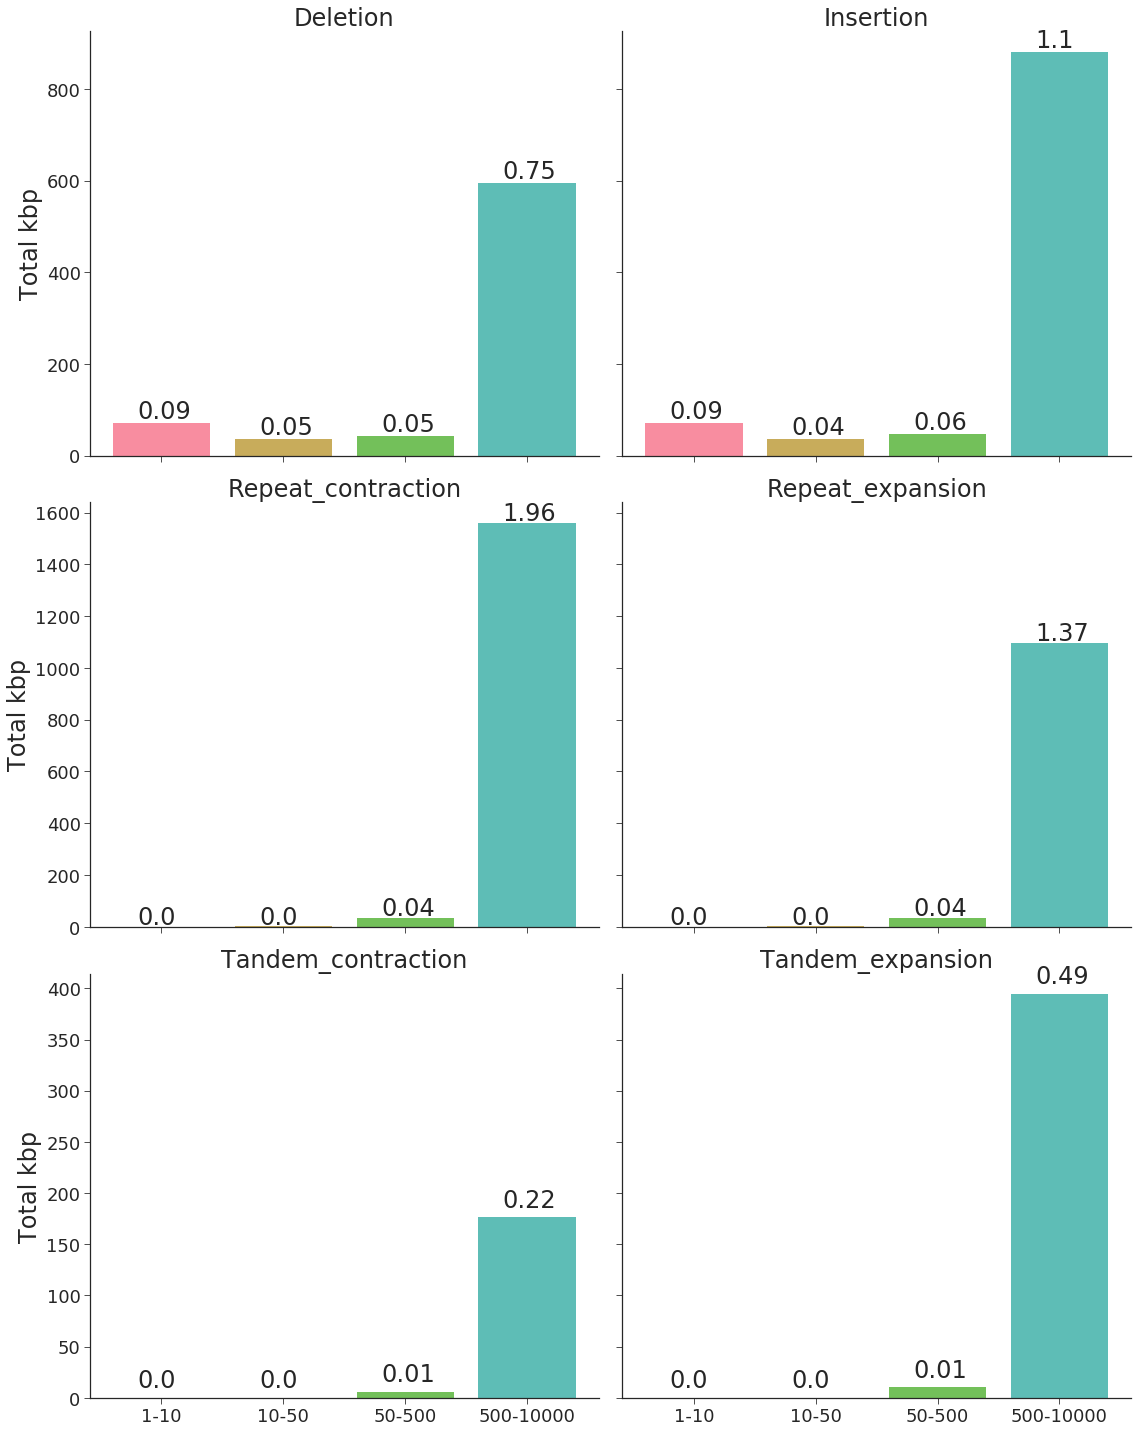

In [15]:
#here get the summary of all Types of variations by size intervals given by Assembletics
Size_summary_10kb = Assemblytics_summary_df_10kb.sum(level='numbers', axis=1)['Total bp']/1000
index_a = [x.replace(' bp', '') for x in Size_summary_10kb["Insertion"].index]
var_types = Size_summary_10kb.index.levels[0]
#plot
sns.despine(offset=10, trim=True)
pwh_size = 79770604
#here generate a faced plot for the size variation types
no_subplots = len(var_types)
no_of_subplots_pair = [int(no_subplots/2), 2]
subplot_coordinates = list(product(range(no_of_subplots_pair[0]), range(no_of_subplots_pair[1])))
subplot_coordinates_list = [list(l) for l in subplot_coordinates]
subplot_coordinates_list_rows = [i[0] for i in subplot_coordinates_list]
subplot_coordinates_list_columns = [i[1] for i in subplot_coordinates_list]
fig, ax = plt.subplots(no_of_subplots_pair[0], no_of_subplots_pair[1], figsize=(16,20),\
                   sharey='row', sharex='all')
#
#up to here generate what is needed to specificy the plots
ymax = Size_summary_10kb.max()
ind = np.arange(len(index_a))
fs = 24 #fontsize
#function to generate the subplots
def subplots(ax_ind1, ax_ind2, ind, series, name):
    sns.set_style("ticks")
    sns.despine()
    width = 0.35
    ax[ax_ind1, ax_ind2].bar(ind,series, color=sns.color_palette("husl", 6), alpha=0.8)
    for x in range(0, len(series)):
            _percentage = (series[x]*1000)/pwh_size*100
            ax[ax_ind1, ax_ind2].text\
            (x-0.2, series[x]+10, round(_percentage,2), fontsize=fs)
    ax[ax_ind1, ax_ind2].set_title(name, fontsize = fs)
    if ax_ind2 == 0:
        ax[ax_ind1, ax_ind2].set_ylabel('Total kbp', fontsize = fs)
    ax[ax_ind1, ax_ind2].grid(False, which='Major')
    ax[ax_ind1, ax_ind2].tick_params(axis='both', which='major', labelsize=18, pad=3)
    ax[ax_ind1, ax_ind2].set_xticks([0, 1, 2 ,3] )
    ax[ax_ind1, ax_ind2].set_xticklabels(index_a, {'fontsize' : 18, 'horizontalalignment': 'center'}  )
    #ax[ax_ind1, ax_ind2].set_ylim(0, series.max()*1000*1.2)
    for tick in ax[ax_ind1, ax_ind2].yaxis.get_major_ticks():
              tick.label.set_fontsize(21)
        
    
for ax_ind1, ax_ind2, _type in  \
zip(subplot_coordinates_list_rows,subplot_coordinates_list_columns, var_types):
    subplots(ax_ind1, ax_ind2, ind, Size_summary_10kb[_type], _type)
plt.tight_layout()
fig_name = 'Assemblytics_summary_df_10kb_v2.type_summary.png'
plt.savefig(os.path.join(FIGURE_PATH, fig_name), bbox_inches='tight')

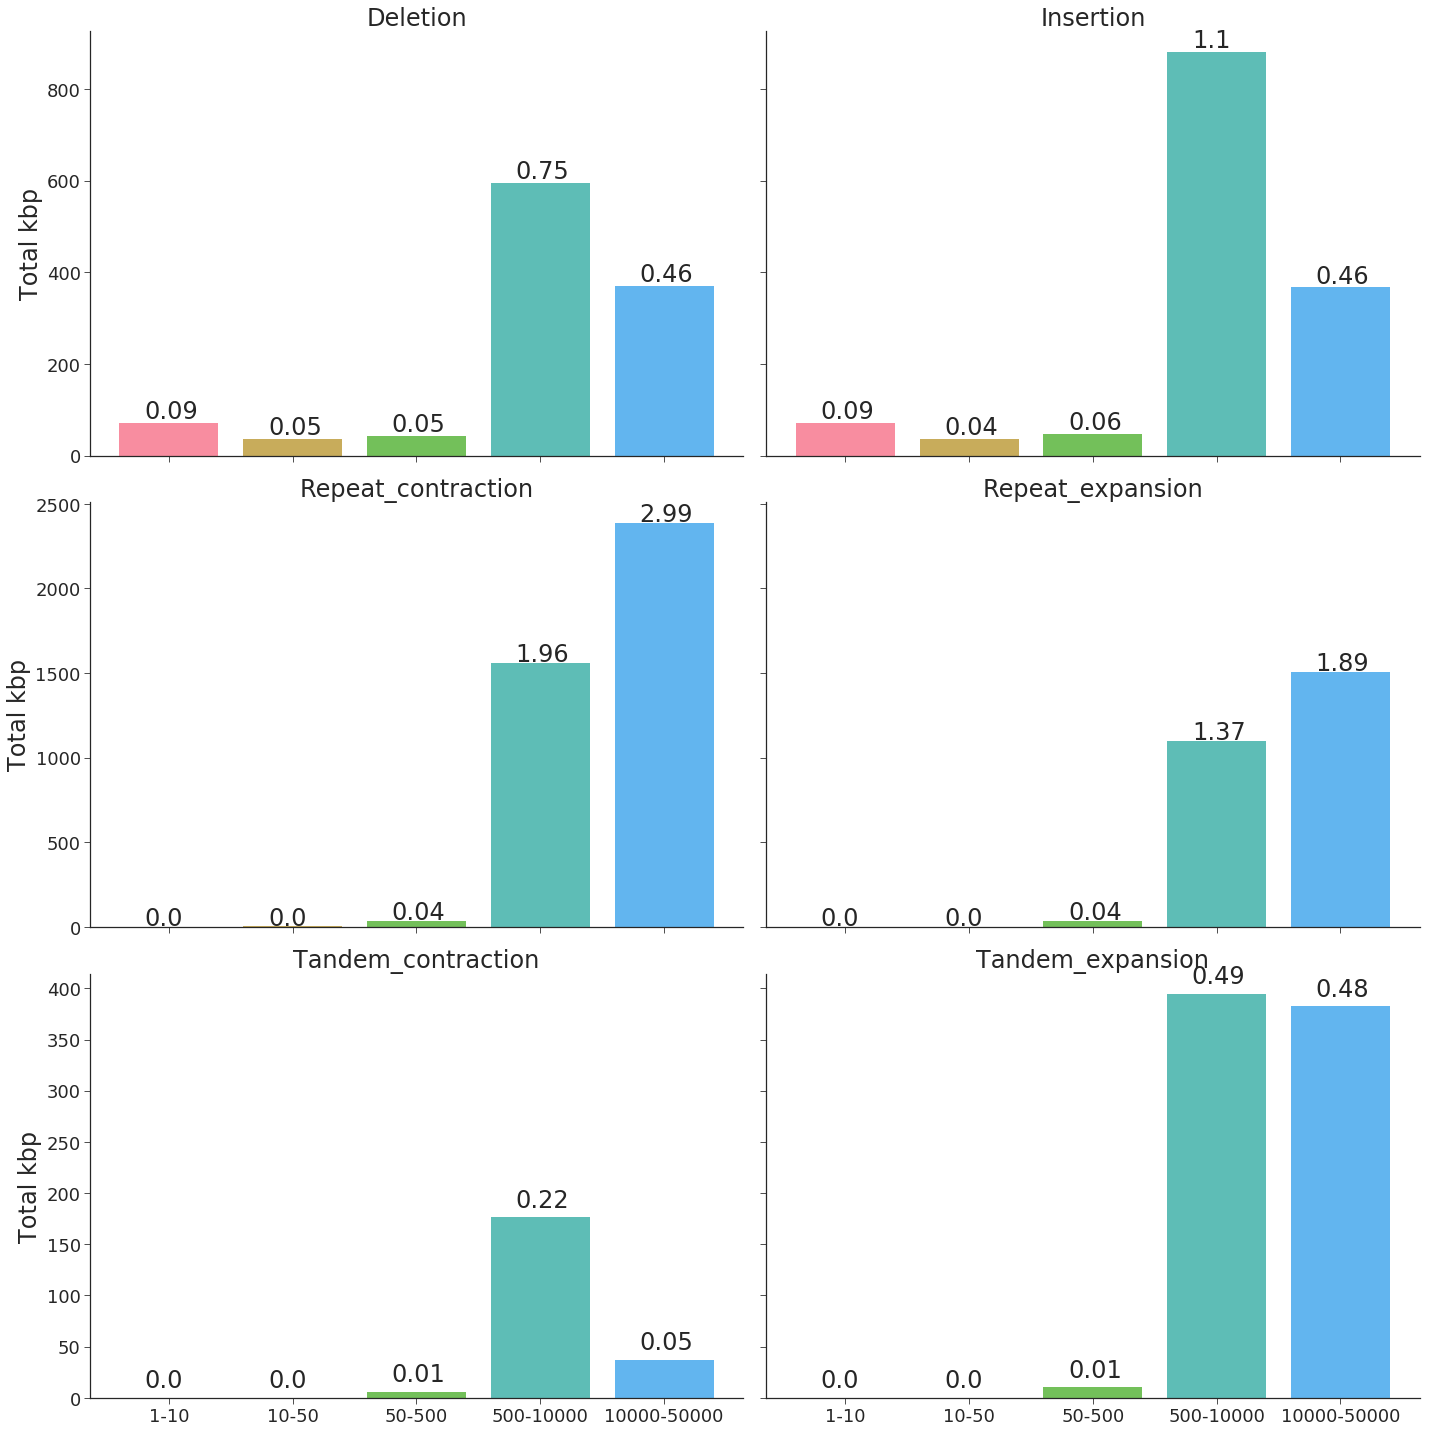

In [16]:
#here get the summary of all Types of variations by size intervals given by Assembletics
Size_summary_50kb = Assemblytics_summary_df_50kb.sum(level='numbers', axis=1)['Total bp']/1000
index_a = [x.replace(' bp', '') for x in Size_summary_50kb["Insertion"].index]
var_types = Size_summary_50kb.index.levels[0]
#plot
sns.despine(offset=10, trim=True)
pwh_size = 79770604
#here generate a faced plot for the size variation types
no_subplots = len(var_types)
no_of_subplots_pair = [int(no_subplots/2), 2]
subplot_coordinates = list(product(range(no_of_subplots_pair[0]), range(no_of_subplots_pair[1])))
subplot_coordinates_list = [list(l) for l in subplot_coordinates]
subplot_coordinates_list_rows = [i[0] for i in subplot_coordinates_list]
subplot_coordinates_list_columns = [i[1] for i in subplot_coordinates_list]
fig, ax = plt.subplots(no_of_subplots_pair[0], no_of_subplots_pair[1], figsize=(20,20),\
                   sharey='row', sharex='all')
#
#up to here generate what is needed to specificy the plots
ymax = Size_summary_10kb.max()
ind = np.arange(len(index_a))
fs = 24 #fontsize
#function to generate the subplots
def subplots(ax_ind1, ax_ind2, ind, series, name):
    sns.set_style("ticks")
    sns.despine()
    width = 0.35
    ax[ax_ind1, ax_ind2].bar(ind,series, color=sns.color_palette("husl", 6), alpha=0.8)
    for x in range(0, len(series)):
            _percentage = (series[x]*1000)/pwh_size*100
            ax[ax_ind1, ax_ind2].text\
            (x-0.2, series[x]+10, round(_percentage,2), fontsize=fs)
    ax[ax_ind1, ax_ind2].set_title(name, fontsize = fs)
    if ax_ind2 == 0:
        ax[ax_ind1, ax_ind2].set_ylabel('Total kbp', fontsize = fs)
    ax[ax_ind1, ax_ind2].grid(False, which='Major')
    ax[ax_ind1, ax_ind2].tick_params(axis='both', which='major', labelsize=18, pad=3)
    ax[ax_ind1, ax_ind2].set_xticks([0, 1, 2 ,3, 4] )
    ax[ax_ind1, ax_ind2].set_xticklabels(index_a, {'fontsize' : 18, 'horizontalalignment': 'center'}  )
    #ax[ax_ind1, ax_ind2].set_ylim(0, series.max()*1000*1.2)
    for tick in ax[ax_ind1, ax_ind2].yaxis.get_major_ticks():
              tick.label.set_fontsize(21)
        
    
for ax_ind1, ax_ind2, _type in  \
zip(subplot_coordinates_list_rows,subplot_coordinates_list_columns, var_types):
    subplots(ax_ind1, ax_ind2, ind, Size_summary_50kb[_type], _type)
plt.tight_layout()
fig_name = 'Assemblytics_summary_df_50kb_v2.type_summary.png'
plt.savefig(os.path.join(FIGURE_PATH, fig_name), bbox_inches='tight')

In [17]:
#summarizes here for 10kb
pwh_size = 79770604
Total_summary_df_10kb = Assemblytics_summary_df_10kb.unstack().sum(level='numbers', axis=1)
Total_summary_df_10kb['variation [1/kbp]'] = Total_summary_df_10kb['Total bp']/pwh_size * 1000
total_relative_var_10kb = Total_summary_df_10kb['Total bp'].sum()/pwh_size*100
print(round(total_relative_var_10kb, 2))

6.39


In [18]:
#summarizes here for 10kb
pwh_size = 79770604
Total_summary_df_50kb = Assemblytics_summary_df_50kb.unstack().sum(level='numbers', axis=1)
Total_summary_df_50kb['variation [1/kbp]'] = Total_summary_df_50kb['Total bp']/pwh_size * 1000
total_relative_var_50kb = Total_summary_df_50kb['Total bp'].sum()/pwh_size*100
print(round(total_relative_var_50kb, 2))

12.72


In [23]:
Total_summary_df_50kb['Total bp'].sum()

10149820

In [19]:
#find the 

In [20]:
Assemblytics_summary_df_10kb.head()

contig_id              pcontig_000          pcontig_001          pcontig_002  \
numbers                      Count Total bp       Count Total bp       Count   
Type      Size range                                                           
Insertion 1-10 bp             1745     3696        1563     2960        1153   
          10-50 bp              96     1664          69     1251          71   
          50-500 bp              9     1592           7     1768          10   
          500-10000 bp          17    53726          14    50216           5   
Deletion  1-10 bp             2096     3928        1826     3091        1127   

contig_id                       pcontig_003          pcontig_004           \
numbers                Total bp       Count Total bp       Count Total bp   
Type      Size range                                                        
Insertion 1-10 bp          2300         887     1993         805     1699   
          10-50 bp         1348          63     1161          58      931   
          50-500 bp        1623          11     2087           7     1568   
          500-10000 bp    14224           7    21368          11    19412   
Deletion  1-10 bp          2145        1037     2082        1094     2097   

contig_id                ...    pcontig_164          pcontig_166           \
numbers                  ...          Count Total bp       Count Total bp   
Type      Size range     ...                                                
Insertion 1-10 bp        ...              4        4          10       10   
          10-50 bp       ...              0        0           0        0   
          50-500 bp      ...              0        0           0        0   
          500-10000 bp   ...              0        0           0        0   
Deletion  1-10 bp        ...              7        7          10       13   

contig_id              pcontig_184          pcontig_189          pcontig_225  \
numbers                      Count Total bp       Count Total bp       Count   
Type      Size range                                                           
Insertion 1-10 bp               20       25          94      112          31   
          10-50 bp               0        0           1       16           1   
          50-500 bp              0        0           0        0           0   
          500-10000 bp           0        0           0        0           0   
Deletion  1-10 bp               19       19          54       81          45   

contig_id                        
numbers                Total bp  
Type      Size range             
Insertion 1-10 bp            54  
          10-50 bp           10  
          50-500 bp           0  
          500-10000 bp        0  
Deletion  1-10 bp            50  

[5 rows x 194 columns]

For the figure going with this pick the following alignment plots
for example pcontig_28, pcontig_10, pcontig_12, pcontig_02, pcontig_19

In [21]:
Assemblytics_summary_df_10kb.unstack().xs('Total bp', level='numbers', axis =1)\
    .sum(level='contig_id', axis=1).sum(axis=0)

contig_id
pcontig_000    240916
pcontig_001    260858
pcontig_002    132508
pcontig_003    161804
pcontig_004    118256
pcontig_005    148063
pcontig_006    191235
pcontig_007    117450
pcontig_008    129876
pcontig_009    130747
pcontig_010     83499
pcontig_011    136294
pcontig_012    118672
pcontig_013     77774
pcontig_014     81909
pcontig_016    126908
pcontig_017    104664
pcontig_018    106932
pcontig_019     90563
pcontig_020     92471
pcontig_021    100608
pcontig_022     95936
pcontig_023     79602
pcontig_025     25831
pcontig_026    121407
pcontig_027     62719
pcontig_028     73176
pcontig_029     92206
pcontig_030     85150
pcontig_031     50939
                ...  
pcontig_075      1407
pcontig_077      8001
pcontig_078      6396
pcontig_079        21
pcontig_080       573
pcontig_081     21118
pcontig_082      4739
pcontig_083     32255
pcontig_084     22634
pcontig_086      6486
pcontig_088     14797
pcontig_089       125
pcontig_090      4685
pcontig_091      1412


In [22]:
Assemblytics_summary_df_10kb['contig_id']

KeyError: 'contig_id'

In [ ]:
Total_summary_df_10kb

In [ ]:
total_relative_var = Total_summary_df_10kb['Total bp'].sum()/pwh_size*100

In [ ]:
float(total_relative_var)

In [ ]:
By_size_summary = Assemblytics_summary_df.unstack().sum(level=['Size range', 'numbers'], axis =1).iloc[:,range(1,11,2)].T

In [ ]:
By_size_summary['Total bp'] = By_size_summary.sum(axis =1)
By_size_summary['variation [1/kbp]'] = By_size_summary['Total bp']/pwh_size * 1000

In [ ]:
By_size_summary

In [ ]:
Assemblytics_summary_df.unstack().sum(level='numbers', axis=1)

In [ ]:
Assemblytics_summary_df.sum(level='numbers', axis=1)['Total bp']["Insertion"][0]

In [ ]:
summary_file = [x for x in os.listdir(os.path.abspath(_8kbp_folders[0])) if x.endswith('Assemblytics_structural_variants.summary.csv')]

In [ ]:
file_name = os.path.join(base_folder, _8kbp_folders[0], summary_file[0])

In [ ]:
file_name

In [ ]:
variation_types = ['Insertion', 'Deletion', 'Tandem_expansion', 'Tandem_contraction', 'Repeat_expansion', 'Repeat_contraction']

In [ ]:
with open(file_name) as s_handle:
    out_handle = open(file_name+'df', 'w')
    variation_type = ''
    for line in s_handle:
        if line.strip() == '':
            continue
        if 'Total' in line:
            continue
        line = line.strip('\n')
        if line in variation_types:
            variation_type = line
            next
        else:
            line = variation_type + ','+line
            print(line, file=out_handle)
    out_handle.close()                

In [ ]:
var_df = pd.read_csv(file_name+'df', header=None, names=['Type', 'Size range', 'Count', 'Total bp'])

In [ ]:
var_df.head()

In [ ]:
index = pd.MultiIndex.from_tuples(list(zip(var_df['Type'],var_df['Size range'])), names=['Type', 'Size range'])

In [ ]:
var_df = var_df.set_index(index)
var_df.columns
test = var_df.iloc[:,2:]
test_columns = list(test.columns)

In [ ]:
col_index = pd.MultiIndex.from_tuples(list(zip(['contig', 'contig'], test_columns)),names = ['contig','numbers'])

In [ ]:
test.columns = col_index

In [ ]:
test.head()

In [ ]:
return_contig_id('Pst_E104_v1_pcontig_037_php_8kbp')

In [ ]:
m.groups()[0]

In [ ]:
pd.concat([var_df.iloc[:,2:],var_df.iloc[:,2:]], axis=1)

In [ ]:
var_df.iloc[:,2:].merge(var_df.iloc[:,2:], right_on=True)

In [ ]:
var_df.head()

In [ ]:
def blast_outfmt6_to_bed(x):
    blast_fo = open(x, 'r')
    blast_lines = blast_fo.readlines()
    bed_file_name = x + '.bed'
    bed_fo = open(bed_file_name, 'w+')
    for l in blast_lines:
        content = l.split('\t')
        if int(content[8]) - int(content[9]) < 1:
            print(content[1], int(content[8]) -1, content[9], content[0], content[10], "+", sep="\t", file=bed_fo) 
        else:
            print(content[1], int(content[9]) -1, content[8],  content[0], content[10], "-", sep = "\t", file=bed_fo)
    blast_fo.close()
    bed_fo.close()